# How Music Influences Human Brain and Psychological Disorders.


# 1. Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
from scipy.stats import spearmanr

# 2. Data Loading

In [2]:
# Data loading

df = pd.read_csv("/content/mxmh_survey_results.csv")

df.head(5)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


# 3. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [4]:
df.shape

(736, 33)

In [5]:
df.isnull().sum()

,0
Timestamp,0
Age,1
Primary streaming service,1
Hours per day,0
While working,3
Instrumentalist,4
Composer,1
Fav genre,0
Exploratory,0
Foreign languages,4


In [6]:
print(df.duplicated().sum())

0


# 4. Data Cleaning

In [7]:
# filling the missing value in age

df['Age'] = df['Age'].fillna(df['Age'].median())

print(df['Age'].isnull().sum())

0


In [8]:
# converting the the dataypes of variabels from object to float

df[['Insomnia', 'Depression', 'Anxiety', 'OCD']] = df[['Insomnia', 'Depression', 'Anxiety', 'OCD']].apply(pd.to_numeric, errors='coerce')

df[['Insomnia', 'Depression', 'Anxiety', 'OCD']].dtypes

,0
Insomnia,float64
Depression,float64
Anxiety,float64
OCD,float64


In [9]:
# Mapping the frequency of genre columns to numeric values

listening_frequencies = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3}

genre_columns = [g for g in df.columns if g.startswith('Frequency [')]
for x in genre_columns:
  df[x] = df[x].map(listening_frequencies).fillna(df[x])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           736 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    int64  
 12  Frequency [Country]           736 non-null    int64  
 13  Frequ

In [10]:
# Now we will encode the effects of music

effects = {'Worsen': -1, 'No effect': 0, 'Improve': 1}
df['Music effects'] = df['Music effects'].map(effects)

df['Music effects'].dtype

dtype('float64')

# 5. EDA Questions

### Q1. What are the patterns in music listening habit on an individual level who report mental health issues such as anxiety, depression, insomnia, and OCD?

Using spearman to find the correlations

In [11]:

mental_health_list = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
for col in mental_health_list:
    corr, p = spearmanr(df['Hours per day'], df[col], nan_policy='omit')


genre_freq_cols = [col for col in df.columns if col.startswith('Frequency [')]
corr_matrix = df[genre_freq_cols + mental_health_list].corr(method='spearman')

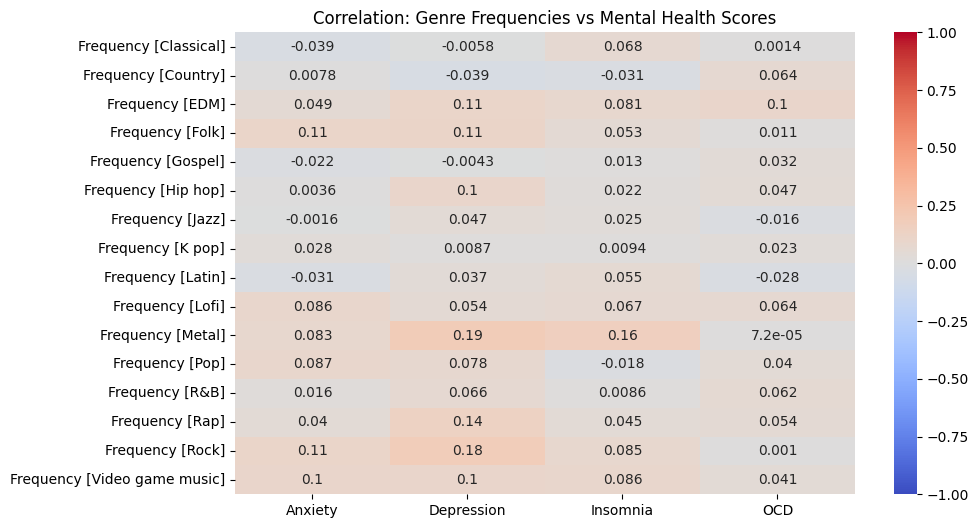

In [12]:
pt.figure(figsize=(10, 6))
sb.heatmap(corr_matrix.loc[genre_freq_cols, mental_health_list], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
pt.title('Correlation: Genre Frequencies vs Mental Health Scores')
pt.show()

### Q2: How does age factor impact the relationship between mental health results and music choice?

In [13]:
age_list = [0, 18, 25, 35, float('inf')]
labels_of_age = ['<18', '18-24', '25-34', '35+']

df['Age Group'] = pd.cut(df['Age'], bins=age_list, labels=labels_of_age)

In [14]:
genre_and_disorder = [
    ('Frequency [Classical]', 'Anxiety'),
    ('Frequency [Metal]', 'Insomnia')
]

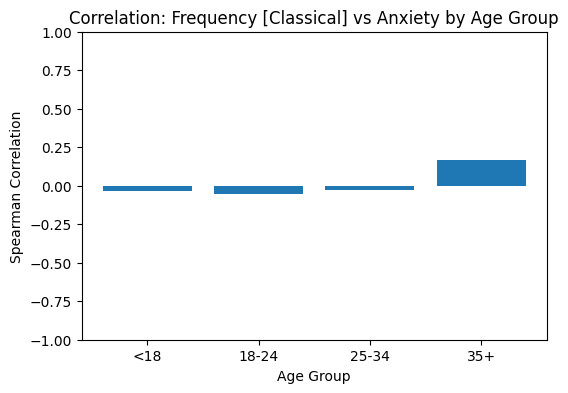

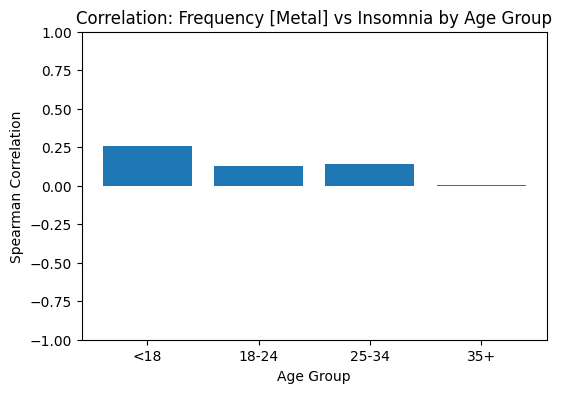

In [15]:
for genre, mh in genre_and_disorder:
    corrs = []
    for age_group in labels_of_age:
        df_age = df[df['Age Group'] == age_group]
        corr, _ = spearmanr(df_age[genre], df_age[mh], nan_policy='omit')
        corrs.append(corr if not np.isnan(corr) else 0)
    pt.figure(figsize=(6, 4))
    pt.bar(labels_of_age, corrs)
    pt.title(f'Correlation: {genre} vs {mh} by Age Group')
    pt.xlabel('Age Group')
    pt.ylabel('Spearman Correlation')
    pt.ylim(-1, 1)
    pt.show()

# Q3: How does the stream service choices and duration of listening shape the psychological impact of listening music.  

In [16]:
# we will use the same list for mental issues in this question too

mental_health_list

['Anxiety', 'Depression', 'Insomnia', 'OCD']

In [17]:
# Now let us groupby the mental health list and primary streaming service dataframes.

mean_of_services_disorders = (df.groupby('Primary streaming service')[mental_health_list].mean())

mean_of_services_disorders

,Anxiety,Depression,Insomnia,OCD
Primary streaming service,,,,
Apple Music,6.627451,5.088235,3.372549,2.666667
I do not use a streaming service.,5.422535,4.070423,3.816901,2.309859
Other streaming service,5.280000,4.300000,3.940000,2.400000
Pandora,5.272727,3.545455,2.272727,1.454545
Spotify,5.977074,5.090611,3.778384,2.801310
YouTube Music,5.372340,4.127660,3.691489,2.287234


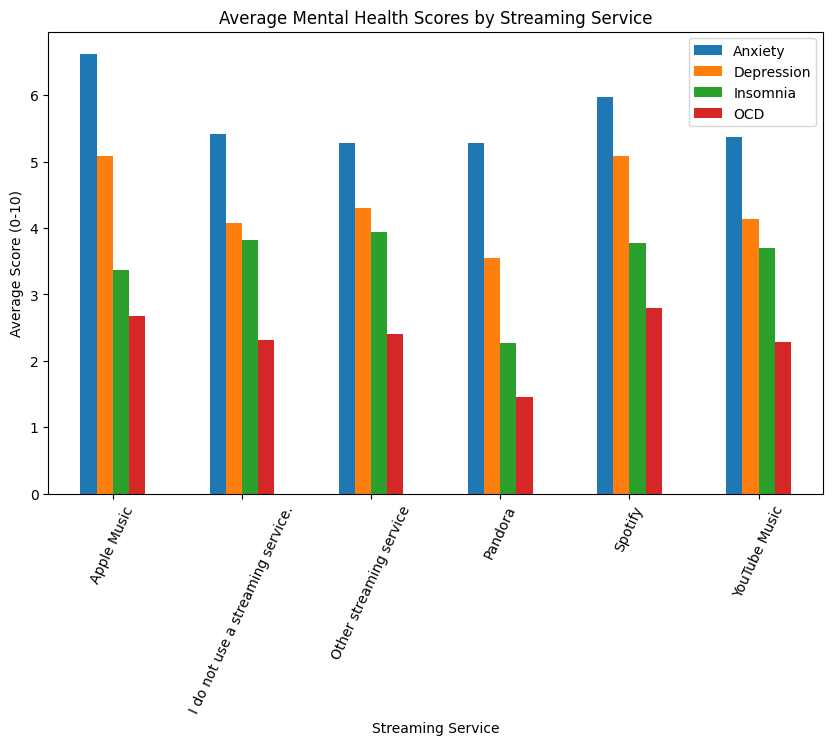

In [18]:
mean_of_services_disorders.plot(kind='bar', figsize=(10, 6))
pt.xticks(rotation=65)
pt.title('Average Mental Health Scores by Streaming Service')
pt.xlabel('Streaming Service')
pt.ylabel('Average Score (0-10)')
pt.show()

In [19]:
#Listening duration against music effect

listening_patterns = [0, 2, 5, 24]

effect_labels = ['<2', '2-5', '>5']

df['Hours Bin'] = pd.cut(df['Hours per day'], bins=listening_patterns, labels=effect_labels)

effects_per_hours = pd.crosstab(df['Hours Bin'], df['Music effects'], normalize='index')

effects_per_hours

Music effects,-1.0,0.0,1.0
Hours Bin,,,
<2,0.030675,0.257669,0.711656
2-5,0.015267,0.198473,0.786260
>5,0.014925,0.223881,0.761194


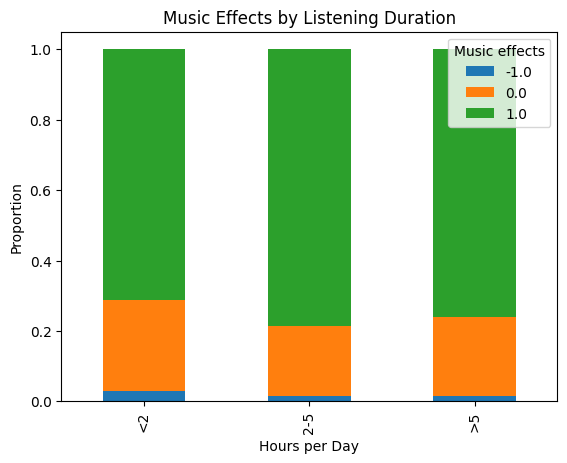

In [20]:
effects_per_hours.plot(kind="bar", stacked=True)

pt.title('Music Effects by Listening Duration')
pt.xlabel('Hours per Day')
pt.ylabel('Proportion')
pt.show()